
# Basic Time Series Metrics & Resampling

Compare time series growth rates

In [1]:
# import library

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
assets_prices = pd.read_csv('data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE').drop(columns='Unnamed: 0')
print(assets_prices.info())
print(assets_prices.head())

<class 'pandas.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None
              SP500   Bonds    Gold    Oil
DATE                                      
2007-06-29  1503.35  402.15  648.50  70.47
2007-07-02  1519.43  402.96  650.50  71.11
2007-07-03  1524.87  402.02  657.25  71.41
2007-07-05  1525.40  400.15  655.90  71.81
2007-07-06  1530.44  399.31  647.75  72.80


In [ ]:
# Select first prices
first_prices = assets_prices.iloc[0]
print(first_prices)

# Create normalized
# Normalization will start with 100 percentage
normalized = assets_prices.div(first_prices).mul(100)
print(normalized.head())

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64
                 SP500       Bonds        Gold         Oil
DATE                                                      
2007-06-29  100.000000  100.000000  100.000000  100.000000
2007-07-02  101.069611  100.201417  100.308404  100.908188
2007-07-03  101.431470   99.967674  101.349268  101.333901
2007-07-05  101.466724   99.502673  101.141095  101.901518
2007-07-06  101.801976   99.293796   99.884348  103.306372


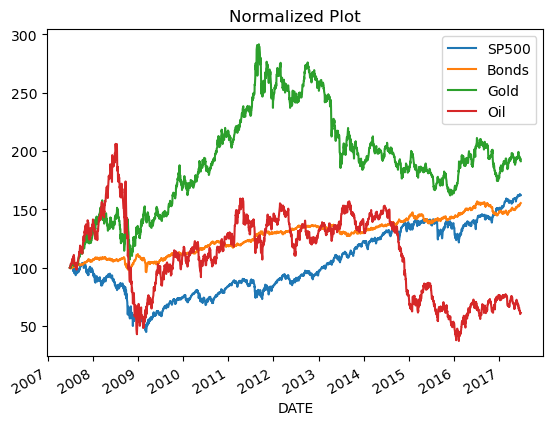

In [10]:
# Plotting

normalized.plot()
plt.title('Normalized Plot')
plt.savefig('output/normalized_assets_prices.png')

plt.show()

Comparing stock prices with a benchmark

In [16]:
nyse = pd.read_csv('data/nyse.csv', parse_dates=['date'], index_col='date').drop(columns='Unnamed: 0')
dow_jones = pd.read_csv('data/daw_jones.csv', parse_dates=['date'], index_col='date').drop(columns='Unnamed: 0')

print('--- NYSE ---')
print(nyse.info())
print(nyse.head())

--- NYSE ---
<class 'pandas.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB
None
              JNJ    JPM    XOM
date                           
2010-01-04  64.68  42.85  69.15
2010-01-05  63.93  43.68  69.42
2010-01-06  64.45  43.92  70.02
2010-01-07  63.99  44.79  69.80
2010-01-08  64.21  44.68  69.52


In [17]:
print('--- DOW JONES ---')
print(dow_jones.info())
print(dow_jones.head())


--- DOW JONES ---
<class 'pandas.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJIA    1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB
None
                DJIA
date                
2010-01-04  10583.96
2010-01-05  10572.02
2010-01-06  10573.68
2010-01-07  10606.86
2010-01-08  10618.19


In [18]:
data_nyse_dow = pd.concat([nyse, dow_jones], axis = 1)
print(data_nyse_dow.head())

              JNJ    JPM    XOM      DJIA
date                                     
2010-01-04  64.68  42.85  69.15  10583.96
2010-01-05  63.93  43.68  69.42  10572.02
2010-01-06  64.45  43.92  70.02  10573.68
2010-01-07  63.99  44.79  69.80  10606.86
2010-01-08  64.21  44.68  69.52  10618.19


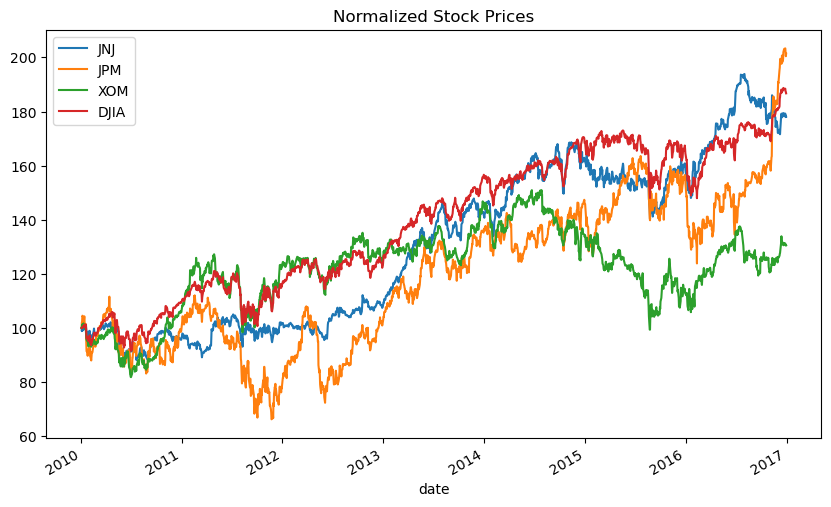

In [23]:
first_row_data_nyse_dow = data_nyse_dow.iloc[0]

normalized = data_nyse_dow.div(first_row_data_nyse_dow).mul(100)

normalized.plot(figsize=(10,6), title = 'Normalized Stock Prices')
plt.savefig('output/nyse_dow_normalized_stock_prices.png')

plt.show()

Plot performance difference vs benchmark index

In [24]:
print(normalized.head())

                   JNJ         JPM         XOM        DJIA
date                                                      
2010-01-04  100.000000  100.000000  100.000000  100.000000
2010-01-05   98.840445  101.936989  100.390456   99.887188
2010-01-06   99.644403  102.497083  101.258134   99.902872
2010-01-07   98.933210  104.527421  100.939986  100.216365
2010-01-08   99.273346  104.270712  100.535069  100.323414


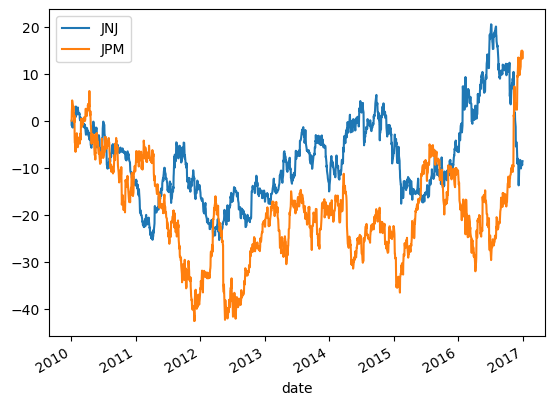

In [25]:
tickers = ['JNJ', 'JPM']

stock_outperform_underperform = normalized[tickers].sub(normalized['DJIA'], axis=0).plot()
plt.show()

Changing the time series frequency: resampling

In [33]:
start_date = '2026-01-01'
end_date = '2026-03-31'

monthly_dates = pd.date_range(start = start_date, end = end_date, freq='ME')
print(monthly_dates)


DatetimeIndex(['2026-01-31', '2026-02-28', '2026-03-31'], dtype='datetime64[us]', freq='ME')


In [34]:
monthly = pd.Series(data=[1,2,3], index=monthly_dates)
print(monthly)

2026-01-31    1
2026-02-28    2
2026-03-31    3
Freq: ME, dtype: int64


In [36]:
weekly_dates = pd.date_range(start_date, end_date, freq = 'W')
print(weekly_dates)

DatetimeIndex(['2026-01-04', '2026-01-11', '2026-01-18', '2026-01-25',
               '2026-02-01', '2026-02-08', '2026-02-15', '2026-02-22',
               '2026-03-01', '2026-03-08', '2026-03-15', '2026-03-22',
               '2026-03-29'],
              dtype='datetime64[us]', freq='W-SUN')


In [37]:
weekly = monthly.reindex(weekly_dates)
print(weekly)

2026-01-04   NaN
2026-01-11   NaN
2026-01-18   NaN
2026-01-25   NaN
2026-02-01   NaN
2026-02-08   NaN
2026-02-15   NaN
2026-02-22   NaN
2026-03-01   NaN
2026-03-08   NaN
2026-03-15   NaN
2026-03-22   NaN
2026-03-29   NaN
Freq: W-SUN, dtype: float64


In [40]:
weekly = monthly.reindex(weekly_dates, method='ffill')
print(weekly)

2026-01-04    NaN
2026-01-11    NaN
2026-01-18    NaN
2026-01-25    NaN
2026-02-01    1.0
2026-02-08    1.0
2026-02-15    1.0
2026-02-22    1.0
2026-03-01    2.0
2026-03-08    2.0
2026-03-15    2.0
2026-03-22    2.0
2026-03-29    2.0
Freq: W-SUN, dtype: float64


In [41]:
weekly = monthly.reindex(weekly_dates, method='bfill')
print(weekly)

2026-01-04    1
2026-01-11    1
2026-01-18    1
2026-01-25    1
2026-02-01    2
2026-02-08    2
2026-02-15    2
2026-02-22    2
2026-03-01    3
2026-03-08    3
2026-03-15    3
2026-03-22    3
2026-03-29    3
Freq: W-SUN, dtype: int64


In [43]:
weekly = monthly.reindex(weekly_dates, fill_value=0)
print(weekly)

2026-01-04    0
2026-01-11    0
2026-01-18    0
2026-01-25    0
2026-02-01    0
2026-02-08    0
2026-02-15    0
2026-02-22    0
2026-03-01    0
2026-03-08    0
2026-03-15    0
2026-03-22    0
2026-03-29    0
Freq: W-SUN, dtype: int64


Create weekly from monthly unemployment data

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


<Axes: xlabel='date'>

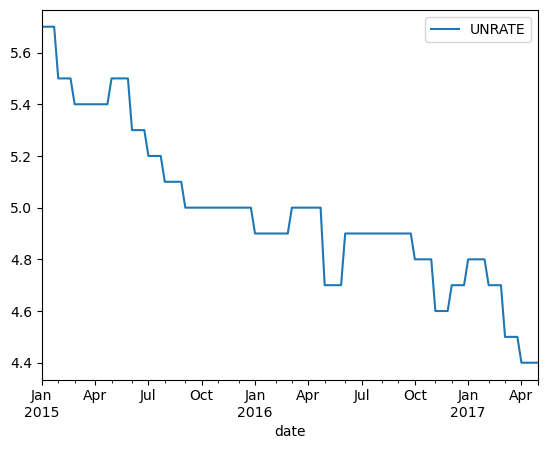

In [47]:
# Import data here
data = pd.read_csv('data/unemployment.csv', parse_dates=['date'], index_col='date').drop(columns='Unnamed: 0')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()

